# 모듈 import

In [1]:
# !pip install selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
pd.set_option('display.max_columns', None) # 데이터프레임 컬럼 display

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import warnings
warnings.filterwarnings('ignore') # 경고 무시

In [2]:
df = pd.read_csv(f'volleyball_fin.csv')
df

,팀명,경기장,관중수,경기날짜,1팀score,2팀score,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,화성종합실내체육관,3482,2017-10-14,3,2,0,메디,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,L,0.347826,1
1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,3,2,0,고예림,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,L,0.217391,1
2,IBK기업은행,화성종합실내체육관,3482,2017-10-14,3,2,0,김희진,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,R,0.217391,1
3,IBK기업은행,화성종합실내체육관,3482,2017-10-14,3,2,0,김미연,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,L,0.101449,1
4,IBK기업은행,화성종합실내체육관,3482,2017-10-14,3,2,0,김수지,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,C,0.086957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,KGC인삼공사,서울장충체육관,1406,2022-02-28,3,0,0,한송이,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,C,0.088889,1
8112,KGC인삼공사,서울장충체육관,1406,2022-02-28,3,0,0,정호영,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,C,0.066667,1
8113,KGC인삼공사,서울장충체육관,1406,2022-02-28,3,0,0,고의정,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,L,0.022222,0
8114,KGC인삼공사,서울장충체육관,1406,2022-02-28,3,0,0,하효림,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,S,0.022222,0


In [3]:
df_WS = pd.read_csv('./volleyball_fin.csv')
pd.set_option('display.max_columns', None)
col = [
      '팀명',
      '경기장',
      '관중수',
      '경기날짜',
      '결과',
      '1팀score',
      '2팀score',
      '이름',
      '득점_득점',
      '공격종합_시도',
      '공격종합_성공',
      '공격종합_공격차단',
      '공격종합_범실',
      '공격종합_성공률',
      '공격종합_점유율',
      '오픈_시도',
      '오픈_성공',
      '오픈_공격차단',
      '오픈_범실',
      '오픈_성공률',
      '오픈_점유율',
      '시간차_시도',
      '시간차_성공',
      '시간차_공격차단',
      '시간차_범실',
      '시간차_성공률',
      '시간차_점유율',
      '이동_시도',
      '이동_성공',
      '이동_공격차단',
      '이동_범실',
      '이동_성공률',
      '이동_점유율',
      '후위_시도',
      '후위_성공',
      '후위_공격차단',
      '후위_범실',
      '후위_성공률',
      '후위_점유율',
      '속공_시도',
      '속공_성공',
      '속공_공격차단',
      '속공_범실',
      '속공_성공률',
      '속공_점유율',
      '퀵오픈_시도',
      '퀵오픈_성공',
      '퀵오픈_공격차단',
      '퀵오픈_범실',
      '퀵오픈_성공률',
      '퀵오픈_점유율',
      '서브_시도',
      '서브_성공',
      '서브_범실',
      '서브_성공률',
      '서브_점유율',
      '디그_시도',
      '디그_성공',
      '디그_실패',
      '디그_범실',
      '디그_세트당',
      '디그_점유율',
      '세트_시도',
      '세트_성공',
      '세트_범실',
      '세트_세트당',
      '세트_점유율',
      '리시브_시도',
      '리시브_정확',
      '리시브_실패',
      '리시브_세트당',
      '리시브_점유율',
      '블로킹_시도',
      '블로킹_성공',
      '블로킹_유효블락',
      '블로킹_실패',
      '블로킹_범실',
      '블로킹_세트당',
      '블로킹_점유율',
      '블로킹_어시스트',
      '벌칙_벌칙',
      '범실_범실',
      '포지션',
      '득점점유율',
      '스타팅멤버',
    ];
st = df_WS['경기장'][0]
date = df_WS['경기날짜'][0]
cnt = 1
num = [1]
for d in range(1, len(df_WS)):
    if (st == (df_WS['경기장'][d]))&(date == (df_WS['경기날짜'][d])):
        num.append(cnt)
    else:
        cnt += 1
        st = df_WS['경기장'][d]
        date = df_WS['경기날짜'][d]
        num.append(cnt)
df_WS['경기번호'] = num
df_WS = df_WS[['경기번호'] + col]
df_WS.to_csv(f'volleyball_gg.csv', index = False)

In [4]:
df_yw = pd.read_csv('./volleyball_gg.csv')
df_yw

,경기번호,팀명,경기장,관중수,경기날짜,결과,1팀score,2팀score,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,포지션,득점점유율,스타팅멤버
0,1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,0,3,2,메디,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,L,0.347826,1
1,1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,0,3,2,고예림,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,L,0.217391,1
2,1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,0,3,2,김희진,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,R,0.217391,1
3,1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,0,3,2,김미연,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,L,0.101449,1
4,1,IBK기업은행,화성종합실내체육관,3482,2017-10-14,0,3,2,김수지,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,C,0.086957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,474,KGC인삼공사,서울장충체육관,1406,2022-02-28,0,3,0,한송이,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,C,0.088889,1
8112,474,KGC인삼공사,서울장충체육관,1406,2022-02-28,0,3,0,정호영,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,C,0.066667,1
8113,474,KGC인삼공사,서울장충체육관,1406,2022-02-28,0,3,0,고의정,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,L,0.022222,0
8114,474,KGC인삼공사,서울장충체육관,1406,2022-02-28,0,3,0,하효림,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,S,0.022222,0


In [5]:
df_yw = df_WS.drop(['공격종합_범실', '오픈_범실', '시간차_범실',            
                    '이동_범실', '후위_범실', '속공_범실', '퀵오픈_범실',
                    '디그_범실', '블로킹_범실', '블로킹_세트당',
                    '오픈_시도', '시간차_시도',            
                    '이동_시도', '후위_시도', '속공_시도', '퀵오픈_시도',
                    '오픈_성공', '시간차_성공',            
                    '이동_성공', '후위_성공', '속공_성공', '퀵오픈_성공',
                    '오픈_공격차단', '시간차_공격차단',        
                    '이동_공격차단', '후위_공격차단', '속공_공격차단', '퀵오픈_공격차단','이름',
                    '오픈_점유율', '시간차_점유율',            
                    '이동_점유율', '후위_점유율', '속공_점유율', '퀵오픈_점유율',
                    '서브_점유율', '디그_점유율', '세트_점유율', '리시브_점유율','블로킹_점유율',
                    '디그_세트당', '리시브_세트당', '블로킹_세트당', '세트_세트당',
                    '오픈_성공률', '시간차_성공률',            
                    '이동_성공률', '후위_성공률', '속공_성공률', '퀵오픈_성공률',
                    '공격종합_성공률', '공격종합_점유율', '서브_성공률', '블로킹_어시스트'
                   ],axis=1)

In [6]:
df_yw.tail()
df_yw.shape

(8116, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 85 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   팀명         8116 non-null   object 
 1   경기장        8116 non-null   object 
 2   관중수        8116 non-null   int64  
 3   경기날짜       8116 non-null   object 
 4   1팀score    8116 non-null   int64  
 5   2팀score    8116 non-null   int64  
 6   결과         8116 non-null   int64  
 7   이름         8116 non-null   object 
 8   득점_득점      8116 non-null   int64  
 9   공격종합_시도    8116 non-null   int64  
 10  공격종합_성공    8116 non-null   int64  
 11  공격종합_공격차단  8116 non-null   int64  
 12  공격종합_범실    8116 non-null   int64  
 13  공격종합_성공률   8116 non-null   float64
 14  공격종합_점유율   8116 non-null   float64
 15  오픈_시도      8116 non-null   int64  
 16  오픈_성공      8116 non-null   int64  
 17  오픈_공격차단    8116 non-null   int64  
 18  오픈_범실      8116 non-null   int64  
 19  오픈_성공률     8116 non-null   float64
 20  오픈_점유율  

In [8]:
df_yw.columns

Index(['경기번호', '팀명', '경기장', '관중수', '경기날짜', '결과', '1팀score', '2팀score', '득점_득점',
       '공격종합_시도', '공격종합_성공', '공격종합_공격차단', '서브_시도', '서브_성공', '서브_범실', '디그_시도',
       '디그_성공', '디그_실패', '세트_시도', '세트_성공', '세트_범실', '리시브_시도', '리시브_정확',
       '리시브_실패', '블로킹_시도', '블로킹_성공', '블로킹_유효블락', '블로킹_실패', '벌칙_벌칙', '범실_범실',
       '포지션', '득점점유율', '스타팅멤버'],
      dtype='object')

In [9]:
df_ge = df_yw.groupby(['경기번호', '팀명', '1팀score', '2팀score'],sort=False)[['득점_득점', '공격종합_시도', '공격종합_성공', '공격종합_공격차단',
       '서브_시도', '서브_성공', '서브_범실', '디그_시도', '디그_성공', '디그_실패', '세트_시도', '세트_성공',
       '세트_범실', '리시브_시도', '리시브_정확', '리시브_실패', '블로킹_시도', '블로킹_성공', '블로킹_유효블락',
       '블로킹_실패', '벌칙_벌칙', '범실_범실']].sum()

df_ge.reset_index(inplace=True)

score = []

for s in range(0, len(df_ge),2):
    score.append(df_ge['1팀score'][s])
    score.append(df_ge['2팀score'][s])

data_ge = df_ge.drop(['1팀score', '2팀score'], axis=1)
data_ge['score'] = score
data_ge.head(30)

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score
0,1,IBK기업은행,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3
1,1,흥국생명,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2
2,2,KGC인삼공사,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2
3,2,현대건설,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3
4,3,한국도로공사,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2
5,3,GS칼텍스,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3
6,4,IBK기업은행,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2
7,4,현대건설,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3
8,5,흥국생명,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3
9,5,KGC인삼공사,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2


In [10]:
# encoding_cols = ['팀명']
# df_yw2 = pd.get_dummies(data_ge, columns = encoding_cols)
# df_yw2.head()

team_name = data_ge['팀명'].astype('category')


In [11]:
team_name = team_name.cat.codes
team_name

0      1
1      6
2      2
3      5
4      4
      ..
943    6
944    4
945    3
946    0
947    2
Length: 948, dtype: int8

In [12]:
data_ge['팀명'] = team_name

In [13]:
df_yw1 = data_ge.groupby(['경기번호']).sum()
df_yw1

,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score
경기번호,,,,,,,,,,,,,,,,,,,,,,,,
1,7,151,371,114,25,199,12,20,263,226,37,383,112,5,184,83,12,164,25,75,42,0,52,5
2,7,180,401,143,27,221,10,17,276,234,42,414,138,2,207,96,10,182,27,64,51,0,42,5
3,4,170,330,138,16,217,16,22,224,184,38,341,128,5,195,81,16,148,16,61,44,0,47,5
4,6,166,347,135,21,205,10,17,236,202,33,365,127,7,187,91,10,166,21,65,51,0,40,5
5,8,154,334,122,20,198,11,16,210,185,25,340,114,4,178,72,11,150,21,53,48,0,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,3,90,175,82,7,98,2,11,114,89,25,110,39,1,117,47,3,71,6,20,27,0,27,3
471,7,141,302,108,26,191,7,25,201,164,36,288,91,5,169,56,8,147,26,59,38,0,55,5
472,7,95,206,77,11,120,7,10,136,114,22,210,71,5,112,29,7,107,11,49,28,0,30,3


In [14]:
data_ge

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score
0,1,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3
1,1,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2
2,2,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2
3,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3
4,3,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0
944,473,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3
945,473,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0
946,474,0,65,89,50,8,71,5,6,65,53,12,95,49,0,48,23,2,58,10,21,16,0,7,3


In [15]:
import numpy as np
leftteam = []
rightteam = []
for i in range(len(data_ge.index)):
    if i%2 == 0:
        leftteam.append(data_ge.iloc[i,:])
    else:
        rightteam.append(data_ge.iloc[i,:])
leftteam = pd.DataFrame(np.array(leftteam))
leftteam.columns = ['경기번호','팀명','득점_득점', '공격종합_시도', '공격종합_성공', '공격종합_공격차단',
       '서브_시도', '서브_성공', '서브_범실', '디그_시도', '디그_성공', '디그_실패', '세트_시도', '세트_성공',
       '세트_범실', '리시브_시도', '리시브_정확', '리시브_실패', '블로킹_시도', '블로킹_성공', '블로킹_유효블락',
       '블로킹_실패', '벌칙_벌칙', '범실_범실','score']
rightteam = pd.DataFrame(np.array(rightteam))
rightteam.columns = ['2경기번호','2팀명','2득점_득점', '2공격종합_시도', '2공격종합_성공', '2공격종합_공격차단',
       '2서브_시도', '2서브_성공', '2서브_범실', '2디그_시도', '2디그_성공', '2디그_실패', '2세트_시도', '2세트_성공',
       '2세트_범실', '2리시브_시도', '2리시브_정확', '2리시브_실패', '2블로킹_시도', '2블로킹_성공', '2블로킹_유효블락',
       '2블로킹_실패', '2벌칙_벌칙', '2범실_범실','2score']
df_yw2 = pd.concat([leftteam,rightteam], axis=1)
df_yw2

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2경기번호,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score
0,1,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3,1,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2
1,2,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3
2,3,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2,3,0,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3
3,4,1,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2,4,5,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3
4,5,6,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3,5,2,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,3,44,91,39,4,56,2,5,58,40,18,95,37,1,64,20,1,39,3,9,13,0,17,0,470,0,46,84,43,3,42,0,6,56,49,7,15,2,0,53,27,2,32,3,11,14,0,10,3
470,471,2,71,145,52,12,99,5,11,106,87,18,125,41,2,78,25,2,73,14,34,16,0,24,3,471,5,70,157,56,14,92,2,14,95,77,18,163,50,3,91,31,6,74,12,25,22,0,31,2
471,472,1,58,103,46,3,71,4,8,72,63,9,108,46,2,51,14,3,60,8,33,11,0,15,3,472,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0
472,473,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3,473,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0


In [16]:
df_yw2.tail(30)

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2경기번호,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score
444,445,6,52,150,44,9,71,3,9,100,90,10,165,46,1,85,28,6,80,5,38,25,0,26,1,445,4,67,148,51,5,96,7,8,107,94,11,153,49,2,67,33,3,75,9,33,21,0,20,3
445,446,2,73,139,55,9,90,4,5,87,72,15,147,54,1,85,34,5,81,14,27,22,0,16,1,446,0,80,156,66,14,95,5,10,91,79,11,157,61,1,87,41,4,69,9,24,23,0,18,3
446,447,3,35,107,34,8,50,0,5,79,61,18,103,30,1,69,18,4,40,1,21,10,0,14,0,447,5,45,80,35,1,50,2,3,62,54,8,61,27,1,37,15,0,51,8,17,15,0,13,3
447,448,6,82,193,68,17,107,7,5,126,110,16,190,63,2,98,36,4,79,7,28,28,0,18,2,448,1,90,176,70,7,108,4,13,124,104,20,180,68,2,95,27,7,96,16,49,17,0,25,3
448,449,4,61,101,44,2,76,4,6,59,47,11,95,40,0,51,21,2,60,13,14,18,0,13,3,449,2,49,110,45,13,56,2,7,71,56,15,108,38,1,73,27,4,39,2,17,14,0,18,0
449,450,3,54,114,43,6,73,2,6,94,79,15,121,38,1,54,16,1,59,9,25,17,0,13,3,450,1,24,63,17,3,42,1,5,55,47,8,111,35,0,19,8,0,44,6,15,14,0,12,0
450,451,5,69,127,50,12,87,11,10,80,72,8,128,47,3,66,25,3,67,8,32,12,0,23,3,451,6,46,125,31,8,69,3,4,88,70,18,135,29,1,71,18,10,51,12,17,16,0,22,1
451,452,0,65,155,54,18,84,5,8,118,104,14,176,50,4,86,33,4,77,6,36,20,0,23,1,452,4,71,163,48,6,89,4,5,102,94,8,148,44,0,76,27,5,95,19,29,33,0,17,3
452,453,1,59,100,47,2,73,2,4,68,60,8,95,41,0,42,16,1,58,10,25,15,0,11,3,453,2,33,90,31,8,37,1,3,55,44,11,85,24,3,64,24,2,25,1,9,8,0,11,0
453,454,6,29,74,22,4,45,1,5,53,43,10,67,16,0,53,20,1,34,6,14,8,0,10,0,454,5,47,77,35,5,57,3,7,59,56,3,97,35,0,33,11,2,44,9,14,13,0,14,3


In [17]:
df_yw2[['팀명','2팀명']] = df_yw2[['팀명','2팀명']].astype('category')
df_yw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   경기번호        474 non-null    int64   
 1   팀명          474 non-null    category
 2   득점_득점       474 non-null    int64   
 3   공격종합_시도     474 non-null    int64   
 4   공격종합_성공     474 non-null    int64   
 5   공격종합_공격차단   474 non-null    int64   
 6   서브_시도       474 non-null    int64   
 7   서브_성공       474 non-null    int64   
 8   서브_범실       474 non-null    int64   
 9   디그_시도       474 non-null    int64   
 10  디그_성공       474 non-null    int64   
 11  디그_실패       474 non-null    int64   
 12  세트_시도       474 non-null    int64   
 13  세트_성공       474 non-null    int64   
 14  세트_범실       474 non-null    int64   
 15  리시브_시도      474 non-null    int64   
 16  리시브_정확      474 non-null    int64   
 17  리시브_실패      474 non-null    int64   
 18  블로킹_시도      474 non-null    int64   
 19  블로킹_성공  

In [18]:
df_yw2.iloc[1][3]

203

In [19]:
result = []

for i in range(0,473):
    #1team 2team 중 score가 0인 팀을 찾음
    dif_score = 0
    if df_yw2.iloc[i][24] == 0:
        zero_team = df_yw2.iloc[i][1]
        for j in range(i+1,473):
            if df_yw2.iloc[j][1] == zero_team:
                dif_score = df_yw2.iloc[j][24] - df_yw2.iloc[j][49] 
                break
            elif df_yw2.iloc[j][26] == zero_team:
                dif_score = df_yw2.iloc[j][49] - df_yw2.iloc[j][24] 
                break
        
    elif df_yw2.iloc[i][49] == 0:
        zero_team = df_yw2.iloc[i][26]
        for j in range(i+1,473):
            if df_yw2.iloc[j][1] == zero_team:
                dif_score = df_yw2.iloc[j][24] - df_yw2.iloc[j][49] 
                break
            elif df_yw2.iloc[j][26] == zero_team:
                dif_score = df_yw2.iloc[j][49] - df_yw2.iloc[j][24] 
                break
    result.append(dif_score)
        
result.append(0)
len(result)
df_yw2['영우가설']=result
#음수가 많으면 가설이 맞는거지 (3:0 (0인 팀의 다음경기 스코어 - 0인팀 상대편의 스코어))
df_yw2['영우가설'].value_counts()

 0    278
-3     61
-2     36
 3     34
 1     25
-1     22
 2     18
Name: 영우가설, dtype: int64

In [20]:
win_lose1 = []
win_lose2 = []
for i in range(0,474):
    if df_yw2.iloc[i][24] - df_yw2.iloc[i][49] < 0:
        win_lose1.append(0)
        win_lose2.append(1)
    else:
        win_lose1.append(1)
        win_lose2.append(0)
df_yw2['팀1승패'] = win_lose1
df_yw2['팀2승패'] = win_lose2
df_yw2

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2경기번호,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score,영우가설,팀1승패,팀2승패
0,1,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3,1,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2,0,1,0
1,2,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3,0,0,1
2,3,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2,3,0,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3,0,0,1
3,4,1,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2,4,5,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3,0,0,1
4,5,6,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3,5,2,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,3,44,91,39,4,56,2,5,58,40,18,95,37,1,64,20,1,39,3,9,13,0,17,0,470,0,46,84,43,3,42,0,6,56,49,7,15,2,0,53,27,2,32,3,11,14,0,10,3,-3,0,1
470,471,2,71,145,52,12,99,5,11,106,87,18,125,41,2,78,25,2,73,14,34,16,0,24,3,471,5,70,157,56,14,92,2,14,95,77,18,163,50,3,91,31,6,74,12,25,22,0,31,2,0,1,0
471,472,1,58,103,46,3,71,4,8,72,63,9,108,46,2,51,14,3,60,8,33,11,0,15,3,472,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0,0,1,0
472,473,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3,473,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0,0,1,0


In [34]:
df_all = df_yw2.copy()
df_all

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2경기번호,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score,영우가설,팀1승패,팀2승패,디그_성공률,2디그_성공률,리시브_성공률,2리시브_성공률,블로킹_성공률,2블로킹_성공률,범실총합,2범실총합,수비_성공률,2수비_성공률,블로킹+리시브_정확,2블로킹+리시브_정확
0,1,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3,1,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2,0,1,0,0.857143,0.861111,0.404040,0.505882,0.117021,0.200000,38,39,0.689102,0.783497,77,81
1,2,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3,0,0,1,0.812500,0.886364,0.475728,0.451923,0.090909,0.190476,18,43,0.689569,0.764381,80,80
2,3,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2,3,0,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3,0,0,1,0.803571,0.839286,0.387755,0.443299,0.118421,0.097222,35,39,0.654874,0.689903,71,71
3,4,1,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2,4,5,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3,0,0,1,0.841270,0.872727,0.542553,0.430108,0.104478,0.141414,32,32,0.744150,0.722124,84,72
4,5,6,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3,5,2,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2,0,1,0,0.880734,0.881188,0.400000,0.408602,0.177419,0.113636,38,28,0.729077,0.701713,57,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,3,44,91,39,4,56,2,5,58,40,18,95,37,1,64,20,1,39,3,9,13,0,17,0,470,0,46,84,43,3,42,0,6,56,49,7,15,2,0,53,27,2,32,3,11,14,0,10,3,-3,0,1,0.689655,0.875000,0.312500,0.509434,0.076923,0.093750,23,16,0.539539,0.739092,29,38
470,471,2,71,145,52,12,99,5,11,106,87,18,125,41,2,78,25,2,73,14,34,16,0,24,3,471,5,70,157,56,14,92,2,14,95,77,18,163,50,3,91,31,6,74,12,25,22,0,31,2,0,1,0,0.820755,0.810526,0.320513,0.340659,0.191781,0.162162,37,48,0.666524,0.656674,59,56
471,472,1,58,103,46,3,71,4,8,72,63,9,108,46,2,51,14,3,60,8,33,11,0,15,3,472,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0,0,1,0,0.875000,0.796875,0.274510,0.245902,0.133333,0.063830,25,20,0.641422,0.553303,47,31
472,473,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3,473,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0,0,1,0,0.918033,0.811594,0.644444,0.392157,0.161290,0.093023,17,11,0.861884,0.648387,47,36


In [35]:
df_yw2['디그_성공률'] = df_yw2['디그_성공'] / df_yw2['디그_시도']
df_yw2['2디그_성공률'] = df_yw2['2디그_성공'] / df_yw2['2디그_시도']
df_yw2['리시브_성공률'] = df_yw2['리시브_정확'] / df_yw2['리시브_시도']
df_yw2['2리시브_성공률'] = df_yw2['2리시브_정확'] / df_yw2['2리시브_시도']
df_yw2['블로킹_성공률'] = df_yw2['블로킹_성공'] / df_yw2['블로킹_시도']
df_yw2['2블로킹_성공률'] = df_yw2['2블로킹_성공'] / df_yw2['2블로킹_시도']
df_yw2['범실총합'] = df_yw2['서브_범실'] + df_yw2['세트_범실'] + df_yw2['범실_범실']
df_yw2['2범실총합'] = df_yw2['2서브_범실'] + df_yw2['2세트_범실'] + df_yw2['2범실_범실']
df_yw2['수비_성공률'] = (df_yw2['디그_성공률'] + df_yw2['리시브_성공률'] + df_yw2["블로킹_성공률"]) / 2
df_yw2['2수비_성공률'] = (df_yw2['2디그_성공률'] + df_yw2['2리시브_성공률'] + df_yw2["2블로킹_성공률"]) / 2
df_yw2['블로킹+리시브_정확'] = df_yw2['블로킹_유효블락'] + df_yw2['리시브_정확']
df_yw2['2블로킹+리시브_정확'] = df_yw2['2블로킹_유효블락'] + df_yw2['2리시브_정확']


In [36]:
df_yw2

,경기번호,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2경기번호,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score,영우가설,팀1승패,팀2승패,디그_성공률,2디그_성공률,리시브_성공률,2리시브_성공률,블로킹_성공률,2블로킹_성공률,범실총합,2범실총합,수비_성공률,2수비_성공률,블로킹+리시브_정확,2블로킹+리시브_정확
0,1,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3,1,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2,0,1,0,0.857143,0.861111,0.404040,0.505882,0.117021,0.200000,38,39,0.689102,0.783497,77,81
1,2,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3,0,0,1,0.812500,0.886364,0.475728,0.451923,0.090909,0.190476,18,43,0.689569,0.764381,80,80
2,3,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2,3,0,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3,0,0,1,0.803571,0.839286,0.387755,0.443299,0.118421,0.097222,35,39,0.654874,0.689903,71,71
3,4,1,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2,4,5,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3,0,0,1,0.841270,0.872727,0.542553,0.430108,0.104478,0.141414,32,32,0.744150,0.722124,84,72
4,5,6,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3,5,2,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2,0,1,0,0.880734,0.881188,0.400000,0.408602,0.177419,0.113636,38,28,0.729077,0.701713,57,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,470,3,44,91,39,4,56,2,5,58,40,18,95,37,1,64,20,1,39,3,9,13,0,17,0,470,0,46,84,43,3,42,0,6,56,49,7,15,2,0,53,27,2,32,3,11,14,0,10,3,-3,0,1,0.689655,0.875000,0.312500,0.509434,0.076923,0.093750,23,16,0.539539,0.739092,29,38
470,471,2,71,145,52,12,99,5,11,106,87,18,125,41,2,78,25,2,73,14,34,16,0,24,3,471,5,70,157,56,14,92,2,14,95,77,18,163,50,3,91,31,6,74,12,25,22,0,31,2,0,1,0,0.820755,0.810526,0.320513,0.340659,0.191781,0.162162,37,48,0.666524,0.656674,59,56
471,472,1,58,103,46,3,71,4,8,72,63,9,108,46,2,51,14,3,60,8,33,11,0,15,3,472,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0,0,1,0,0.875000,0.796875,0.274510,0.245902,0.133333,0.063830,25,20,0.641422,0.553303,47,31
472,473,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3,473,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0,0,1,0,0.918033,0.811594,0.644444,0.392157,0.161290,0.093023,17,11,0.861884,0.648387,47,36


In [37]:
df_yw3 = df_yw2.drop(['경기번호', '공격종합_성공','팀2승패',  '2공격종합_성공',
               '서브_성공',  '2서브_성공', '2경기번호',
               '디그_성공', '디그_시도', '2디그_성공', '2디그_시도', '디그_실패', '2디그_실패', 
               '리시브_정확', '리시브_시도', '2리시브_정확', '2리시브_시도',
               '블로킹_성공', '블로킹_시도', '2블로킹_성공', '2블로킹_시도',
               '서브_범실', '세트_범실', '범실_범실',
               '2서브_범실', '2세트_범실', '2범실_범실',
               '디그_성공률', '리시브_성공률', '2디그_성공률', '2리시브_성공률',
               '블로킹_성공률', '2블로킹_성공률', '벌칙_벌칙', '2벌칙_벌칙',
               '블로킹_유효블락', '2블로킹_유효블락', '리시브_정확', '2리시브_정확',
               '블로킹_실패', '2블로킹_실패'], axis=1)
df_yw3

,팀명,득점_득점,공격종합_시도,공격종합_공격차단,서브_시도,세트_시도,세트_성공,리시브_실패,score,2팀명,2득점_득점,2공격종합_시도,2공격종합_공격차단,2서브_시도,2세트_시도,2세트_성공,2리시브_실패,2score,영우가설,팀1승패,범실총합,2범실총합,수비_성공률,2수비_성공률,블로킹+리시브_정확,2블로킹+리시브_정확
0,1,69,179,15,94,188,51,5,3,6,82,192,10,105,195,61,7,2,0,1,38,39,0.689102,0.783497,77,81
1,2,78,203,20,105,207,63,5,2,5,102,198,7,116,207,75,5,3,0,0,18,43,0.689569,0.764381,80,80
2,4,82,156,7,108,162,61,9,2,0,88,174,9,109,179,67,7,3,0,0,35,39,0.654874,0.689903,71,71
3,1,80,178,14,100,188,62,3,2,5,86,169,7,105,177,65,7,3,0,0,32,32,0.744150,0.722124,84,72
4,6,86,168,9,103,172,63,3,3,2,68,166,11,95,168,51,8,2,0,1,38,28,0.729077,0.701713,57,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,3,44,91,4,56,95,37,1,0,0,46,84,3,42,15,2,2,3,-3,0,23,16,0.539539,0.739092,29,38
470,2,71,145,12,99,125,41,2,3,5,70,157,14,92,163,50,6,2,0,1,37,48,0.666524,0.656674,59,56
471,1,58,103,3,71,108,46,3,3,6,37,103,8,49,102,25,4,0,0,1,25,20,0.641422,0.553303,47,31
472,4,62,106,4,53,19,8,3,3,3,29,92,8,38,116,34,4,0,0,1,17,11,0.861884,0.648387,47,36


In [38]:
df_yw3['최종_범실총합'] = df_yw3['범실총합'] - df_yw3['2범실총합']
df_yw3['최종_공격종합_시도'] = df_yw3['공격종합_시도'] - df_yw3['2공격종합_시도']
df_yw3['최종_블로킹+리시브_정확'] = df_yw3['블로킹+리시브_정확'] - df_yw3['2블로킹+리시브_정확']
df_yw3['최종_득점_득점'] = df_yw3['득점_득점'] - df_yw3['2득점_득점']
df_yw3['최종_서브_시도'] = df_yw3['서브_시도'] - df_yw3['2서브_시도']
df_yw3['최종_공격종합_공격차단'] = df_yw3['공격종합_공격차단'] - df_yw3['2공격종합_공격차단']
df_yw3['최종_세트_시도'] = df_yw3['세트_시도'] - df_yw3['2세트_시도']
df_yw3['최종_세트_성공'] = df_yw3['세트_성공'] - df_yw3['2세트_성공']
df_yw3['최종_수비_성공률'] = df_yw3['수비_성공률'] - df_yw3['2수비_성공률']

In [39]:
df_final = df_yw3.drop(['득점_득점', '서브_시도', '공격종합_공격차단', '세트_시도','범실총합','2범실총합','수비_성공률','2수비_성공률'
                      ,'블로킹+리시브_정확','2블로킹+리시브_정확','공격종합_시도','2공격종합_시도','세트_성공', '2세트_성공',
                      '2득점_득점', '2서브_시도', '2공격종합_공격차단', '2세트_시도'],axis=1)


In [40]:
df_final.columns

Index(['팀명', '리시브_실패', 'score', '2팀명', '2리시브_실패', '2score', '영우가설', '팀1승패',
       '최종_범실총합', '최종_공격종합_시도', '최종_블로킹+리시브_정확', '최종_득점_득점', '최종_서브_시도',
       '최종_공격종합_공격차단', '최종_세트_시도', '최종_세트_성공', '최종_수비_성공률'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df_final.drop(['팀1승패','팀명','2팀명','score','2score','최종_득점_득점','최종_서브_시도'],1)
y = df_final['팀1승패']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify = y )
LogisticRegression().fit(X_train, y_train).score(X_test, y_test)


0.8421052631578947

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pipeline = make_pipeline(
   StandardScaler(),
   DecisionTreeClassifier(max_depth = 4, max_features= 0.8)
)

pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)
for i in range(len(tree.feature_importances_)):
    if tree.feature_importances_[i] != 0:
        print(i, tree.feature_importances_[i], X.columns[i])
print(pipeline.score(X_train, y_train), pipeline.score(X_test, y_test))

0 0.014716236785155885 리시브_실패
1 0.03769417179606278 2리시브_실패
2 0.007111361290927854 영우가설
3 0.07405715162720188 최종_범실총합
4 0.013714768203932288 최종_공격종합_시도
5 0.042241486068111456 최종_블로킹+리시브_정확
6 0.16046584049222595 최종_공격종합_공격차단
7 0.14340907861780955 최종_세트_시도
8 0.3958437984000383 최종_세트_성공
9 0.11074610671853408 최종_수비_성공률
0.9234828496042217 0.7578947368421053


In [43]:
#randomoforest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42,max_depth=4)

clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.941952506596306, 0.8421052631578947)

In [44]:
#xgboost
from xgboost import XGBClassifier

# 모델 생성

# 학습
clf = XGBClassifier(random_state=42,max_depth=2)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9973614775725593, 0.8315789473684211)

In [45]:
from lightgbm import LGBMClassifier

# 모델 생성
# 학습
clf = LGBMClassifier(random_state=42,max_depth=2)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9551451187335093, 0.8421052631578947)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [46]:
df_all = df_all.drop(['디그_성공률','2디그_성공률','리시브_성공률','2리시브_성공률','블로킹_성공률','2블로킹_성공률',
             '범실총합','2범실총합','수비_성공률','2수비_성공률','블로킹+리시브_정확','2블로킹+리시브_정확',
                      '팀2승패','영우가설','경기번호','2경기번호'],axis=1)
df_all

,팀명,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,서브_시도,서브_성공,서브_범실,디그_시도,디그_성공,디그_실패,세트_시도,세트_성공,세트_범실,리시브_시도,리시브_정확,리시브_실패,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,벌칙_벌칙,범실_범실,score,2팀명,2득점_득점,2공격종합_시도,2공격종합_성공,2공격종합_공격차단,2서브_시도,2서브_성공,2서브_범실,2디그_시도,2디그_성공,2디그_실패,2세트_시도,2세트_성공,2세트_범실,2리시브_시도,2리시브_정확,2리시브_실패,2블로킹_시도,2블로킹_성공,2블로킹_유효블락,2블로킹_실패,2벌칙_벌칙,2범실_범실,2score,팀1승패
0,1,69,179,51,15,94,7,10,119,102,17,188,51,3,99,40,5,94,11,37,30,0,25,3,6,82,192,63,10,105,5,10,144,124,20,195,61,2,85,43,7,70,14,38,12,0,27,2,1
1,2,78,203,66,20,105,5,4,144,117,27,207,63,1,103,49,5,77,7,31,21,0,13,2,5,102,198,77,7,116,5,13,132,117,15,207,75,1,104,47,5,105,20,33,30,0,29,3,0
2,4,82,156,66,7,108,7,11,112,90,22,162,61,2,98,38,9,76,9,33,19,0,22,2,0,88,174,72,9,109,9,11,112,94,16,179,67,3,97,43,7,72,7,28,25,0,25,3,0
3,1,80,178,66,14,100,7,8,126,106,20,188,62,5,94,51,3,67,7,33,18,0,19,2,5,86,169,69,7,105,3,9,110,96,13,177,65,2,93,40,7,99,14,32,33,0,21,3,0
4,6,86,168,67,9,103,8,11,109,96,13,172,63,2,85,34,3,62,11,23,17,0,25,3,2,68,166,55,11,95,3,5,101,89,12,168,51,2,93,38,8,88,10,30,31,0,21,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,3,44,91,39,4,56,2,5,58,40,18,95,37,1,64,20,1,39,3,9,13,0,17,0,0,46,84,43,3,42,0,6,56,49,7,15,2,0,53,27,2,32,3,11,14,0,10,3,0
470,2,71,145,52,12,99,5,11,106,87,18,125,41,2,78,25,2,73,14,34,16,0,24,3,5,70,157,56,14,92,2,14,95,77,18,163,50,3,91,31,6,74,12,25,22,0,31,2,1
471,1,58,103,46,3,71,4,8,72,63,9,108,46,2,51,14,3,60,8,33,11,0,15,3,6,37,103,31,8,49,3,2,64,51,13,102,25,3,61,15,4,47,3,16,17,0,15,0,1
472,4,62,106,48,4,53,4,7,61,56,5,19,8,0,45,29,3,62,10,18,17,0,10,3,3,29,92,24,8,38,1,3,69,56,13,116,34,0,51,20,4,43,4,16,13,0,8,0,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# X = df_all.drop(['팀1승패','팀명','2팀명','score','2score','득점_득점','최종_서브_시도','2득점_득점'],1)
X = df_all.drop(['팀1승패','팀명','2팀명','score','2score','득점_득점','2득점_득점','2서브_시도','서브_시도','리시브_시도','2리시브_시도','공격종합_성공','2공격종합_성공'],1)
y = df_all['팀1승패']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
LogisticRegression().fit(X_train, y_train).score(X_test, y_test)


0.9368421052631579

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pipeline = make_pipeline(
   StandardScaler(),
   DecisionTreeClassifier(max_depth = 4, max_features= 0.8)
)
importance_list = []
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train), pipeline.score(X_test, y_test)
for i in range(len(tree.feature_importances_)):
    if tree.feature_importances_[i] != 0:
        importance_list.append((tree.feature_importances_[i], X.columns[i]))
        
importance_list.sort(reverse=True)
importance_list


[(0.1556932966080122, '2블로킹_성공'),
 (0.11315526999584194, '블로킹_성공'),
 (0.10930258612835432, '세트_성공'),
 (0.07420051995633438, '2세트_성공'),
 (0.07418716553325722, '범실_범실'),
 (0.05077640918300259, '디그_성공'),
 (0.048055790363482676, '리시브_정확'),
 (0.04674731868190347, '2서브_성공'),
 (0.044497196323824886, '2리시브_정확'),
 (0.04262473389079212, '2리시브_실패'),
 (0.035240912933220625, '2공격종합_시도'),
 (0.0321747541426308, '리시브_실패'),
 (0.02692395208527844, '2세트_범실'),
 (0.026343631379015697, '블로킹_시도'),
 (0.02260401991171222, '2서브_범실'),
 (0.02250231453528157, '세트_범실'),
 (0.016552550014088473, '공격종합_공격차단'),
 (0.014887677221647593, '2디그_실패'),
 (0.014136475945341275, '블로킹_유효블락'),
 (0.008543251620174696, '2디그_성공'),
 (0.008213280525294353, '디그_실패'),
 (0.00800929839391378, '2블로킹_유효블락'),
 (0.004627594627594631, '2세트_시도')]

In [49]:
#randomoforest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42,max_depth=4)

clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9445910290237467, 0.7789473684210526)

In [50]:
#xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold 
# 모델 생성
clf = XGBClassifier(random_state=42,max_depth=2)
cnt = 0
for train_index, test_index in KFold(n_splits=60, random_state=42, shuffle=True).split(X):
    X_train_fold, X_valid_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train_fold, y_train_fold)
    print(clf.score(X_train_fold, y_train_fold), clf.score(X_valid_fold, y_valid_fold))
    break
# 학습

# clf.fit(X_train, y_train)
# clf.score(X_train, y_train), clf.score(X_test, y_test)

0.9978540772532188 0.75


In [51]:
from lightgbm import LGBMClassifier

# 모델 생성
# 학습
clf = LGBMClassifier(random_state=42,max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8105263157894737)

In [52]:
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")

In [53]:
df_final.loc[:, 'score']

0      3
1      2
2      2
3      2
4      3
      ..
469    0
470    3
471    3
472    3
473    3
Name: score, Length: 474, dtype: int64

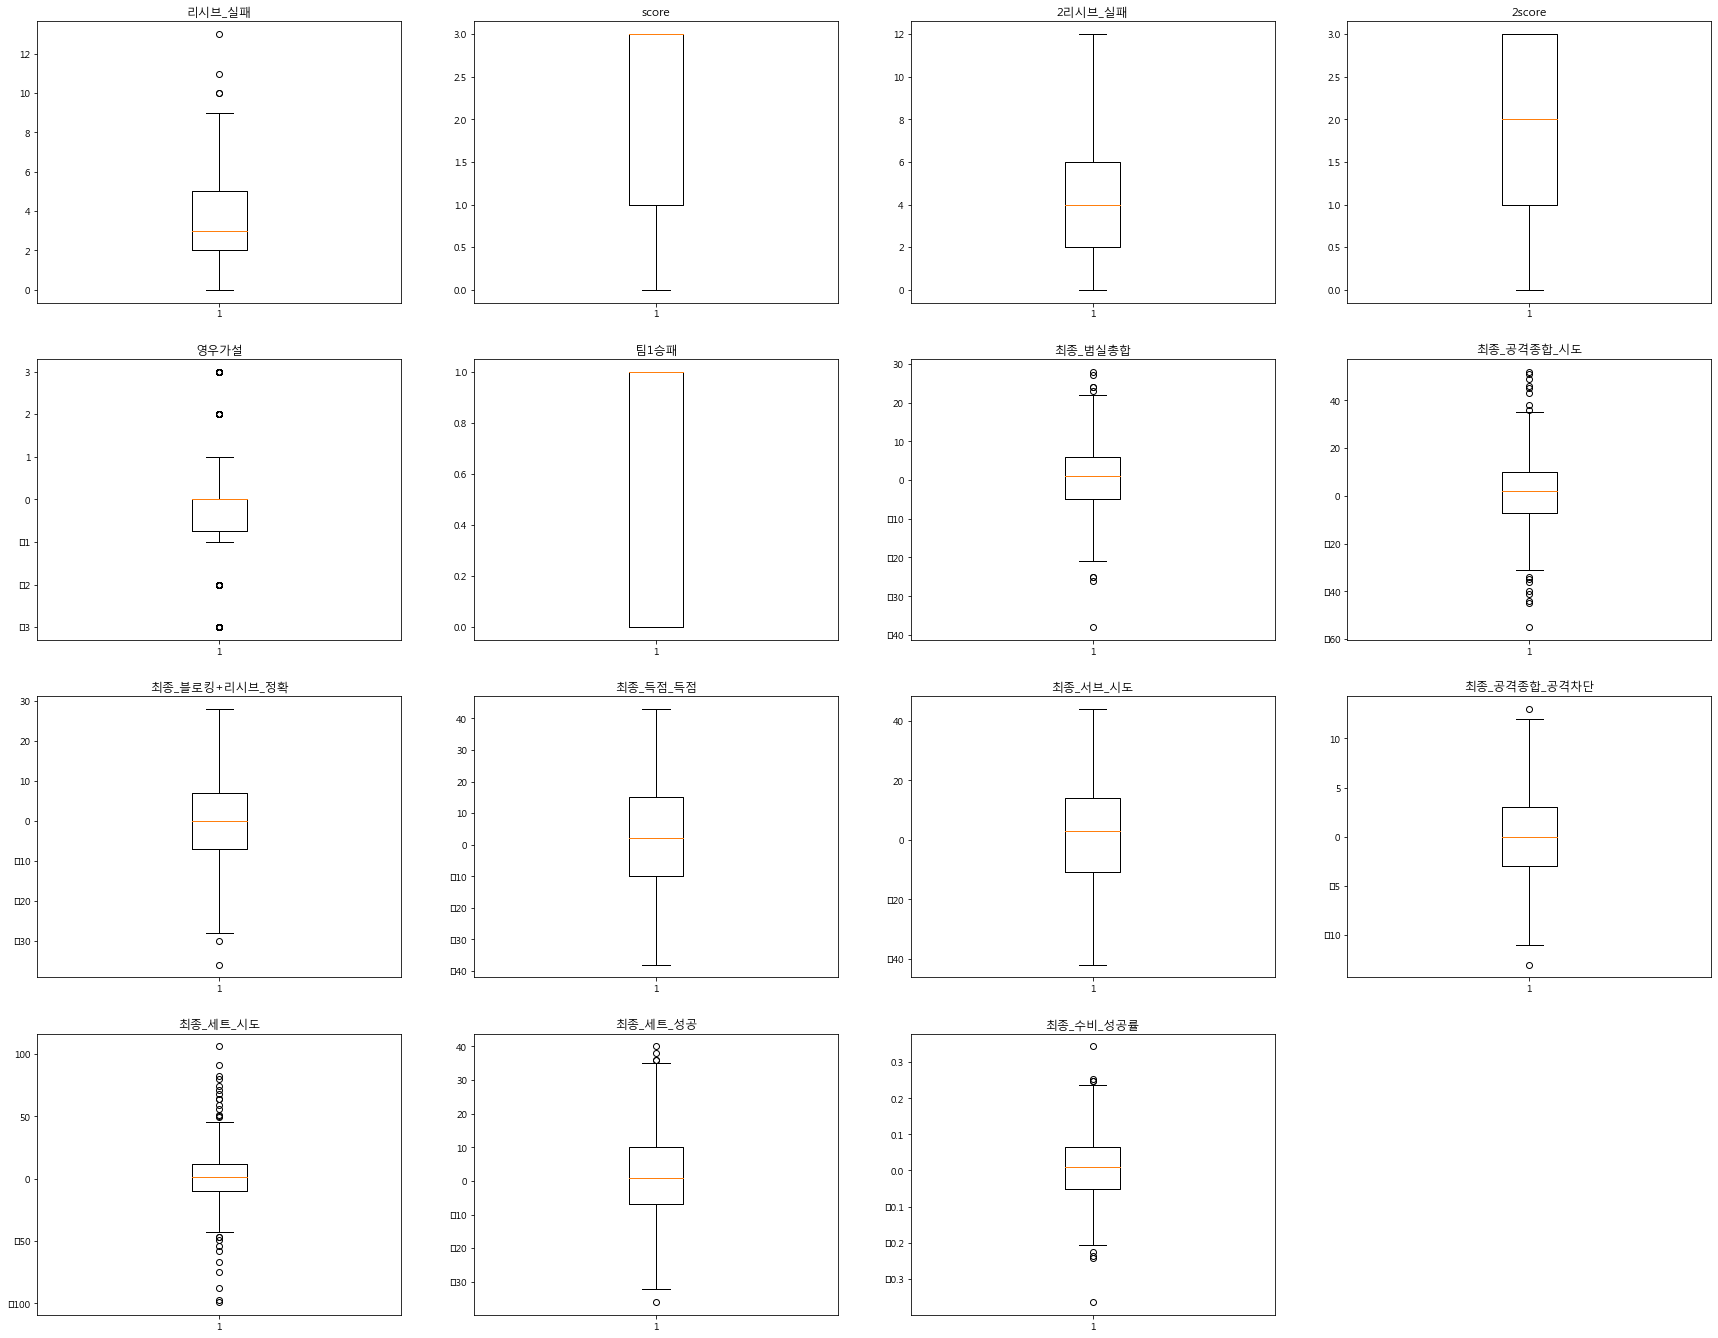

In [54]:
import matplotlib
plt.figure(figsize=(30,30))
# f, axes = plt.subplots(5, 5)

for i,v in enumerate (df_final.select_dtypes(include='number').columns):  
    plt.subplot(5,4,i+1)
    plt.boxplot(df_final.loc[:, v])
    plt.title(v)
#     df_final.boxplot(column=v, by="팀1승패", ax=axes[i//8,i%8]) 
plt.show()
